In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [14]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [15]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [16]:
X = data.drop('0',axis = 1)
y = data['0']

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [18]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

/var/folders/tc/swr_wcn9303cg774vg1rgjzw0000gn/T/ipykernel_4407/3429060831.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  train_yint = np.int0(y)


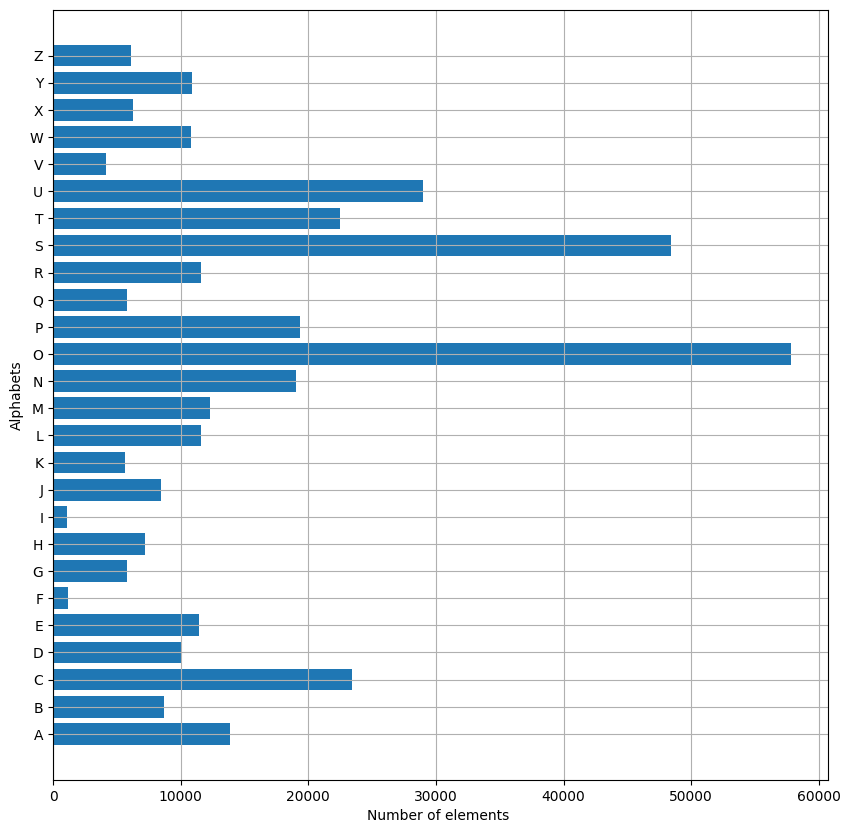

In [19]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()


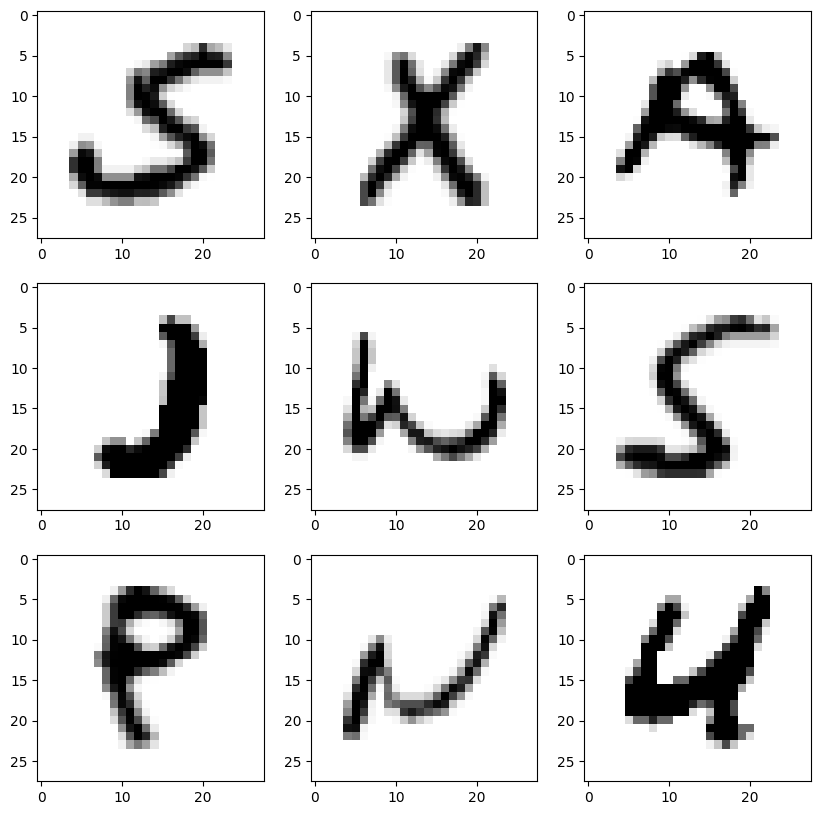

In [20]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


In [21]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [22]:
train_new = to_categorical(train_y, num_classes=26)
print("New shape of train labels: ", train_new.shape)

test_new = to_categorical(test_y, num_classes=26)
print("New shape of test labels: ", test_new.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_new, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_new))


model.summary()
model.save(r'model_hand.h5')

/Users/soumyadip/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.9118 - loss: 0.3927 - val_accuracy: 0.9713 - val_loss: 0.1024 - learning_rate: 0.0010
Epoch 2/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.9786 - loss: 0.0765 - val_accuracy: 0.9727 - val_loss: 0.1008 - learning_rate: 0.0010
Epoch 3/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.9828 - loss: 0.0611 - val_accuracy: 0.9823 - val_loss: 0.0679 - learning_rate: 0.0010
Epoch 4/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9853 - loss: 0.0542 - val_accuracy: 0.9814 - val_loss: 0.0778 - learning_rate: 0.0010
Epoch 5/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - accuracy: 0.9926 - loss: 0.0263 - val_accuracy: 0.9916 - val_loss: 0.0338 - learning_rate: 2.0000e-04
Epoch 6/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - accuracy: 0.9964 - loss: 0.0123 - val_accuracy: 0.9928 - val_loss: 0.0336 - learning_rate: 2.0000e-04
Epoch 7/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - accur

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

In [24]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9713250398635864, 0.972680926322937, 0.9823197722434998, 0.9814069271087646, 0.9916096329689026, 0.9928312301635742, 0.9938515424728394, 0.9941468834877014, 0.9953416585922241]
The training accuracy is : [0.9570009112358093, 0.9799469709396362, 0.9830077886581421, 0.9850852489471436, 0.9935494661331177, 0.9962209463119507, 0.9975533485412598, 0.9980534315109253, 0.999154269695282]
The validation loss is : [0.10235393792390823, 0.10075996071100235, 0.06791304796934128, 0.07781749963760376, 0.03375483304262161, 0.033601921051740646, 0.03085857816040516, 0.03464815765619278, 0.03414134308695793]
The training loss is : [0.16048020124435425, 0.07245068997144699, 0.060981687158346176, 0.05507814511656761, 0.022763362154364586, 0.012928595766425133, 0.00870272796601057, 0.006465403363108635, 0.0029330498073250055]


In [29]:
pred = model.predict(test_X[:2])
print(test_X.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(74490, 28, 28, 1)


In [43]:
fig, axes = plt.subplots(25,25, figsize=(100,100))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_new[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [47]:

from keras.models import load_model

model = load_model(r'model_hand.h5')


In [48]:
model

<Sequential name=sequential, built=True>

In [50]:
model.predict(test_X[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.7939649e-34,
        1.5156484e-31, 0.0000000e+00, 1.7196702e-24, 0.0000000e+00,
        0.0000000e+00, 6.6527907e-27, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.4809874e-35, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.4130205e-38, 1.5879276e-36]], dtype=float32)

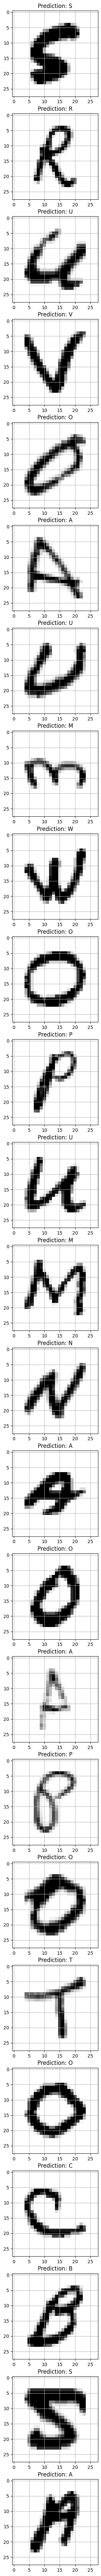

In [51]:
fig, axes = plt.subplots(25,1, figsize=(100,100))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_new[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()